<a href="https://colab.research.google.com/github/yurahuna/graphillion_tutorial/blob/master/ja/08_network_reliability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Network Reliability

This chapter introduces a method for evaluating the **failure resistance** of information and communication networks using Graphillion.

## Information and Communication Networks and Reliability

An information and communication network is a network that enables communication between terminals by connecting them to each other. A communication network can be modeled as a graph with terminals as vertices and links as edges.


Information and communication networks are an important infrastructure that supports people's lives. Therefore, they must continue to operate without failure. **Network reliability** is a measure of how fault-tolerant a network is. Knowing the network reliability of an information and communication network is useful for making the network more resilient to failures.


The following is a definition of network reliability. Network reliability is defined as the probability of communication between specific endpoints, given the probability of failure of the links that make up the network. Let us illustrate with a concrete example.

![Example Network](https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/08/example.png?raw=1)

Consider the reliability of the simple network on the left. Suppose that each link in the network has a 5% probability of failure in a given day. In other words, the link will be out of service 5 out of 100 days. The probability of communication using this network is equal to the probability that the link is available, which is 95%. This 95% value is the network reliability.

Next, let us calculate the network reliability of the network shown in Figure 2. The failure rate of each link is assumed to be 5%. Unlike the previous example, in this case, even if there is a single link failure, communication is still possible because there is another path connecting the endpoints. The network reliability of this network can be calculated by examining all possible combinations of link failures. There are five possible communication failures.
![Example of communicable failures](https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/08/patterns.png?raw=1)


For each of these failures, the probability that the failure pattern will occur is calculated, and when added together, the network reliability, or the probability that communication is possible, can be calculated. The actual calculation yields a network reliability of 99.5%.

In this example, we have calculated the probability of communication between two vertices, but network reliability can also be defined as the probability of communication between K vertices or all vertices.

## Computing network reliability with Graphillion

To compute network reliability, it is necessary to examine an exponential number of failure patterns. Therefore, network reliability computation is known to be exponentially time-consuming with respect to the size of the network, just like the graph problems introduced so far. Also, since this is not an optimization problem where only one good combination needs to be found, existing software for combinatorial optimization is not available.

Graphillion can be used to accurately compute network reliability. The `GraphSet` module implements a method called `gs.probability` that computes the probability of obtaining a graph contained in the graph set `gs` when each edge of the graph is probabilistically chosen. Network reliability is the probability of obtaining a graph in which all vertices are connected. Therefore, the reliability can be computed by creating a graph set and running `gs.probability`.

Here is an example of using Graphilliion to compute network reliability. In this case, the following grid graph is used to determine the probability that communication is possible between all vertices. Note that
Each edge is assumed to fail 5% of the time.

In [1]:
!pip install graphillion
!git clone https://github.com/nsnmsak/graphillion_tutorial
!cp graphillion_tutorial/ja/tutorial_util.py .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for graphillion: filename=Graphillion-1.5-cp310-cp310-linux_x86_64.whl size=2384559 sha256=0fb6d54e5c09966bf2e06c63641299b3c20afc221788b12d172b5574ead066a1
  Stored in directory: /root/.cache/pip/wheels/41/52/0c/381fe526c67fcd6febe031338c1338628120ad9dab12b22c45
Successfully built graphillion
Cloning into 'graphillion_tutorial'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 294 (delta 3), reused 2 (delta 2), pack-reused 288
Receiving objects: 100% (294/294), 6.61 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (179/179), done.


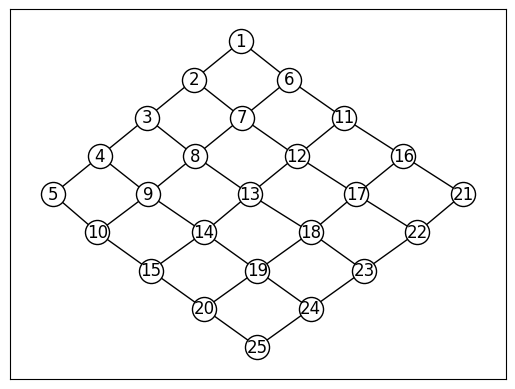

In [2]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_subgraph, draw_universe

univ = tutorial.grid(4, 4)
GraphSet.set_universe(univ)
draw_universe()

Next, create a `GraphSet` object. A subgraph that can communicate on all vertices corresponds to a subgraph containing a spanning tree. A `GraphSet` object representing a set of such graphs can be obtained as follows.

In [3]:
spanning_trees = GraphSet.trees(1, is_spanning=True)
all_subgraphs = GraphSet({})
gs = all_subgraphs.supergraphs(spanning_trees)

If we take a few graphs, we can see that all vertices are connected.

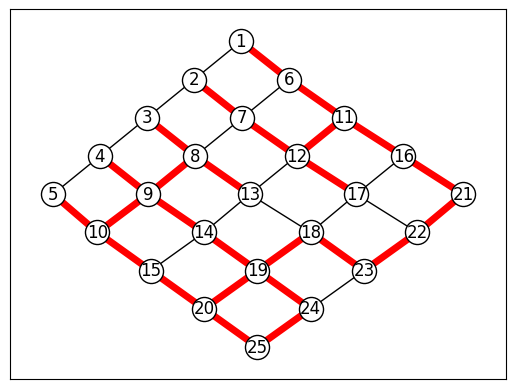

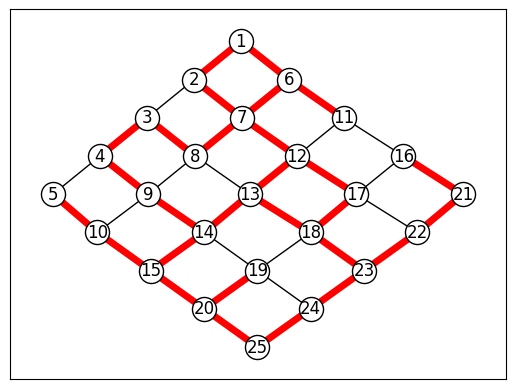

In [4]:
iterator = gs.rand_iter()
draw_subgraph(next(iterator))
draw_subgraph(next(iterator))

The reliability can then be calculated by setting the failure probability and executing the `gs.probability` method.

In [5]:
probs = {edge: 0.95  for edge in univ}
gs.probability(probs)

0.987455319048074

The execution of the `gs.probability()` method takes linear time with respect to the number of vertices in the ZDD corresponding to `gs`.Therefore, unless you are dealing with very large ZDDs, you can find the solution in a realistic time.

## Summary of this chapter

This chapter has shown how to compute network reliability for information and communication networks using Graphillion. Although few people are familiar with network reliability, the computation of reliability itself is both a general problem for graphs and a very difficult problem to compute accurately. Almost no existing software that handles graphs has the ability to accurately calculate network reliability, so this is an application where Graphillion's strengths can be fully utilized.